In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/credit_risk_dataset.csv'
df = pd.read_csv(file_path)

# Display basic info
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(None,
    person_age  person_income person_home_ownership  person_emp_length  \
 0          22          59000                  RENT              123.0   
 1          21           9600                   OWN                5.0   
 2          25           9600              MORTGAGE                1.0   
 3          23          65500                  RENT                4.0   
 4          24          54400                  RENT                8.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
 0    PERSONAL          D      35000          16.02            1   
 1   EDUCATION          B       1000          11.14            0   
 2     MEDICAL          C       5500          12.87            1   
 3     MEDICAL          C      35000          15.23            1   
 4     MEDICAL          C      35000          14.27            1   
 
    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
 0                 0.59                         Y        

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Drop rows with missing values (could also impute, but dropping for simplicity)
df_clean = df.dropna()

# Encode categorical variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Check class distribution before SMOTE
class_distribution_before = y.value_counts()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Return class distributions and shape info
X_train.shape, X_train_resampled.shape, class_distribution_before, y_train_resampled.value_counts()


((22910, 22),
 (35896, 22),
 loan_status
 0    22435
 1     6203
 Name: count, dtype: int64,
 loan_status
 0    17948
 1    17948
 Name: count, dtype: int64)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("/content/credit_risk_dataset.csv")

# Drop rows with missing values
df_clean = df.dropna()

# Encode categorical features
df_encoded = pd.get_dummies(df_clean, columns=[
    'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'
], drop_first=True)

# Split into features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print to verify
print("Original class distribution:\n", y.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Original class distribution:
 loan_status
0    22435
1     6203
Name: count, dtype: int64
After SMOTE:
 loan_status
0    17948
1    17948
Name: count, dtype: int64



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4487
           1       0.90      0.72      0.80      1241

    accuracy                           0.92      5728
   macro avg       0.91      0.85      0.88      5728
weighted avg       0.92      0.92      0.92      5728

Random Forest ROC AUC Score: 0.9267133434272561


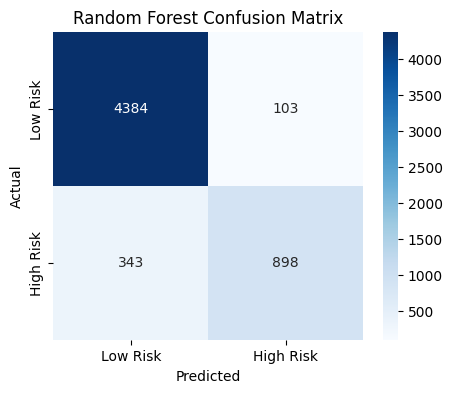


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4487
           1       0.76      0.73      0.75      1241

    accuracy                           0.89      5728
   macro avg       0.84      0.83      0.84      5728
weighted avg       0.89      0.89      0.89      5728

Gradient Boosting ROC AUC Score: 0.91469617573698


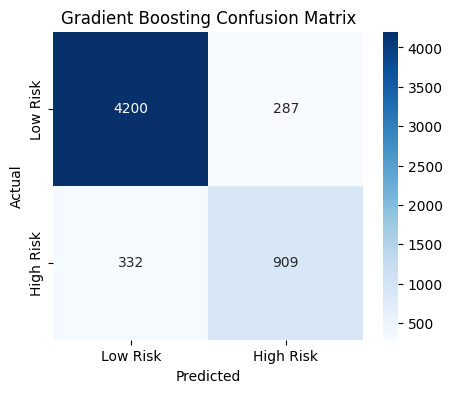

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
rf_preds = rf.predict(X_test_scaled)
rf_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
gb_preds = gb.predict(X_test_scaled)
gb_proba = gb.predict_proba(X_test_scaled)[:, 1]

# Evaluation Function
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name} Classification Report:\n", classification_report(y_true, y_pred))
    print(f"{name} ROC AUC Score:", roc_auc_score(y_true, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
evaluate_model("Gradient Boosting", y_test, gb_preds, gb_proba)



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4487
           1       0.90      0.72      0.80      1241

    accuracy                           0.92      5728
   macro avg       0.91      0.85      0.88      5728
weighted avg       0.92      0.92      0.92      5728

Random Forest ROC AUC Score: 0.9267


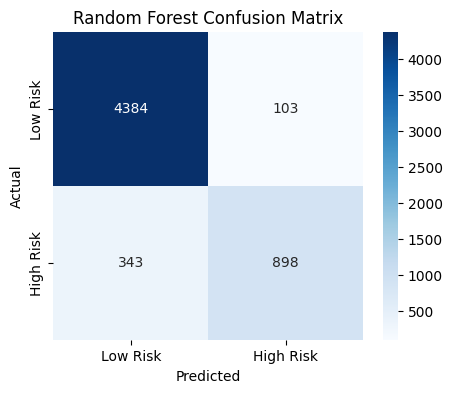


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4487
           1       0.76      0.73      0.75      1241

    accuracy                           0.89      5728
   macro avg       0.84      0.83      0.84      5728
weighted avg       0.89      0.89      0.89      5728

Gradient Boosting ROC AUC Score: 0.9147


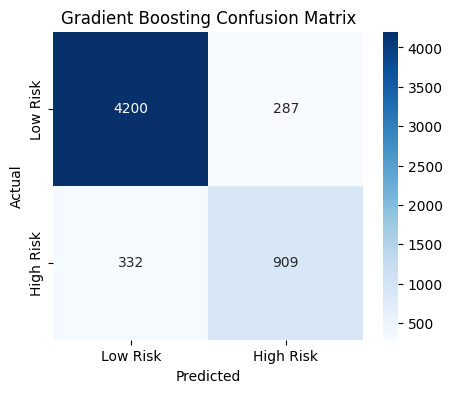

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
rf_preds = rf.predict(X_test_scaled)
rf_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
gb_preds = gb.predict(X_test_scaled)
gb_proba = gb.predict_proba(X_test_scaled)[:, 1]

# Evaluation Function
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name} Classification Report:\n", classification_report(y_true, y_pred))
    print(f"{name} ROC AUC Score: {roc_auc_score(y_true, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
evaluate_model("Gradient Boosting", y_test, gb_preds, gb_proba)
